In [2]:
import numpy as np 
import torch
import matplotlib.pyplot as plt

In [3]:
#@title Visualization code

def image_grid(x):
  size = 32
  channels = 3
  img = x.reshape(-1, size, size, channels)
  w = int(np.sqrt(img.shape[0]))
  img = img.reshape((w, w, size, size, channels)).transpose((0, 2, 1, 3, 4)).reshape((w * size, w * size, channels))
  return img

def show_samples(x, s=10):
  x = x.permute(0, 2, 3, 1).detach().cpu().numpy()
  img = image_grid(x)
  plt.figure(figsize=(s,s))
  plt.axis('off')
  plt.imshow(img)
  plt.show()


In [ ]:
def good_images(loaded_data, key='x'):
    '''Check if the data generation has failed on this GPU'''
    images = loaded_data['x']
    if images.reshape(-1).std()<0.2:
        return False
    else:
        return True

In [14]:
images.shape

(16, 3, 32, 32)

In [26]:
5*64

320

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


19


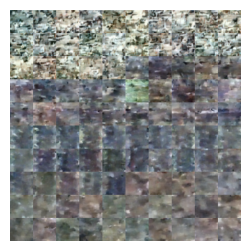

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


20
0.24688186


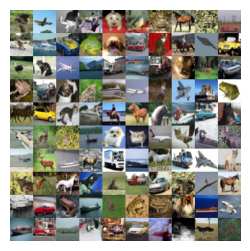

21


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.15184458


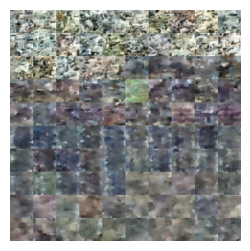

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


28
0.25789085


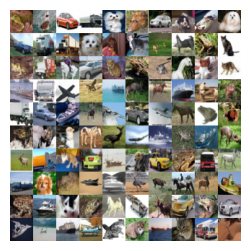

29
0.15589301


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


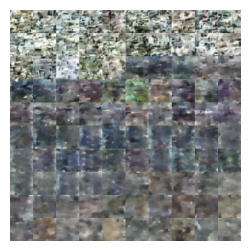

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


23
0.24944632


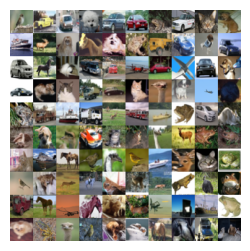

02
0.1070001


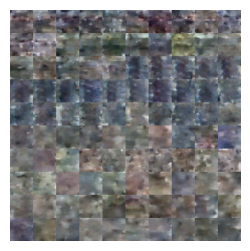

16
0.2485674


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


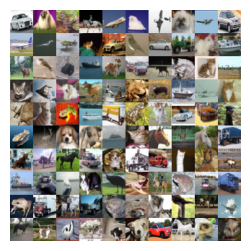

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


08
0.10823172


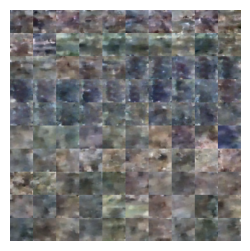

In [30]:
gpu_ids = ['19', '20', '21', '28', '29', '23', '02', '16', '08']
# gpu_ids = ['23']
gpu_names = ['gpu'+n for n in gpu_ids]

data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/' + gpu_ids[0] + '_samples.npz')
all_images = data['x']
print(gpu_ids[0])
show_samples(torch.tensor(all_images),3)

for number in gpu_ids[1:]:
    path = '/vol/bitbucket/fms119/score_sde_pytorch/samples/' + number + '_samples.npz'
    print(number)
    data = np.load(path)
    images = data['x']
    print(images.reshape(-1).std())
    show_samples(torch.tensor(images) ,3)
    all_images = np.concatenate((all_images, images), 0)


In [76]:
np.sqrt(1000)

31.622776601683793

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


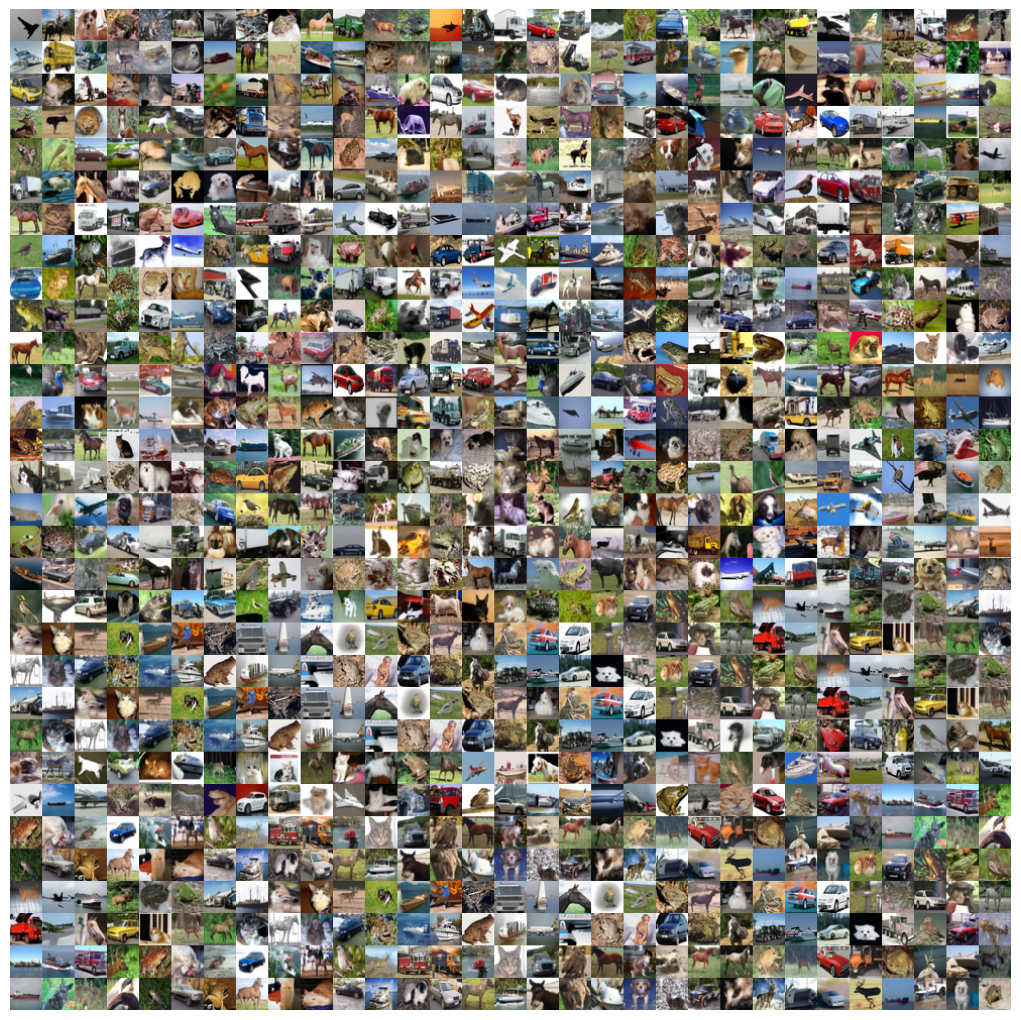

In [78]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_1000.npz')
all_images = data['x']
show_samples(torch.tensor(all_images[:31**2, :, :, :]), 13)

In [59]:
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/'
                        'samples/cirfar10_true_4000.npz')
data_samples = data['images']
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/'
                                'all_samples_400.npz')
gen_samples = data['x']
print(gen_samples.shape)
print(data_samples.transpose(0,3,1,2).shape)

(400, 3, 32, 32)
(4000, 3, 32, 32)


In [57]:
data_samples.transpose(0,3,1,2).shape
# data_samples.shape

(4000, 3, 32, 32)

In [61]:
data_samples.max()

255

In [63]:
gen_samples.max()

1.042978286743164

In [67]:
import numpy as np

# Load data_samples
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/cirfar10_true_4000.npz')
data_samples = data['images'].transpose(0, 3, 1, 2)

# Load gen_samples
data = np.load('/vol/bitbucket/fms119/score_sde_pytorch/samples/all_samples_400.npz')
gen_samples = data['x']


In [70]:
gen_samples.shape

(400, 3, 32, 32)

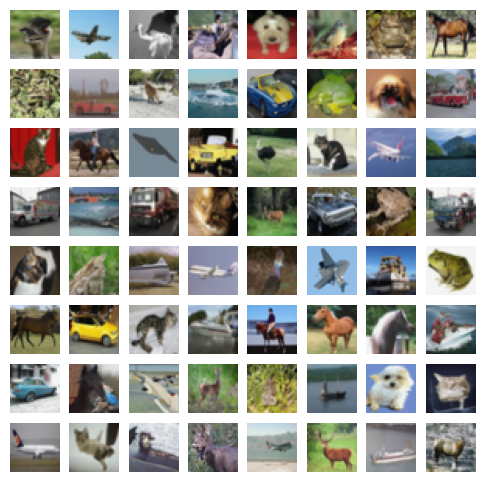

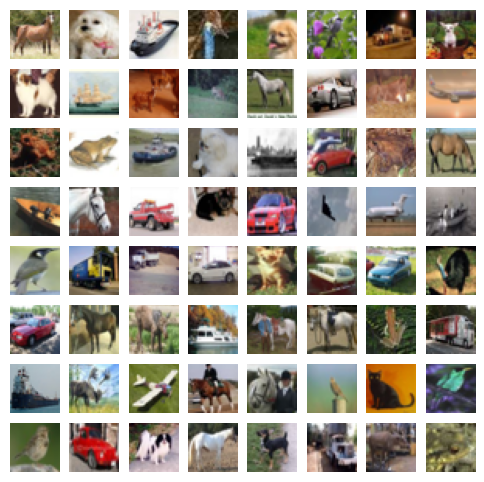

In [73]:
import matplotlib.pyplot as plt

def plot_images(image_array):
    fig, axs = plt.subplots(8, 8, figsize=(6, 6))
    for i, ax in enumerate(axs.flat):
        # numpy transpose to reshape the image to (32, 32, 3)
        img = np.transpose(image_array[i], (1, 2, 0))
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# Assuming img_array_1 and img_array_2 are your image arrays

plot_images(gen_samples)
plot_images(data_samples)
